In [2]:
import pandas as pd

In [3]:
df = pd.read_json('/content/TelecomX_Data.json')


In [4]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
# Estatísticas descritivas para colunas numéricas e categóricas
df.describe(include='all')

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [7]:
# Verificar valores nulos por coluna
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [8]:
# quantidade de clientes que saíram ou permaneceram
evasoes = df['Churn'].value_counts().reset_index()
evasoes

,Churn,count
0,No,5174
1,Yes,1869
2,,224


#Normalização da coluna customer


In [9]:
df_normalizado_customers = pd.json_normalize(df['customer'])

In [10]:
df_normalizado_customers

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [11]:
# Verificar a distribuição dos generos
df_normalizado_customers['gender'].value_counts().reset_index()

,gender,count
0,Male,3675
1,Female,3592


In [12]:
# Verificar a distribuição cliente ter ou nao idade => 65
df_normalizado_customers['SeniorCitizen'].value_counts().reset_index()

,SeniorCitizen,count
0,0,6085
1,1,1182


In [13]:
# Verificar a distribuição da variável 'tenure' (meses de contrato do cliente)
df_normalizado_customers['tenure'].value_counts().reset_index()


,tenure,count
0,1,634
1,72,369
2,2,246
3,3,207
4,4,185
...,...,...
68,28,60
69,39,59
70,44,54
71,36,50


In [14]:
# media de meses de contrato por genero
df_normalizado_customers.groupby('gender')[['tenure']].mean()

,tenure
gender,
Female,32.203229
Male,32.486531


In [15]:
# Soma total(meses de contrato do cliente)
soma_tenure = df_normalizado_customers['tenure'].sum()
soma_tenure

np.int64(235062)

In [16]:
#media
media_tenure = df_normalizado_customers['tenure'].mean()
media_tenure

np.float64(32.34649786707032)

In [17]:
#mediana
mediana_tenure = df_normalizado_customers['tenure'].median()
mediana_tenure

29.0

In [18]:
#desvio padrao
desvio_padrao_tenure = df_normalizado_customers['tenure'].std()
desvio_padrao_tenure


24.571772888767292

In [19]:
df_normalizado_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


#Normalização da coluna internet

In [20]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [21]:
df_normalizado_internet = pd.json_normalize(df['internet'])

In [22]:
df_normalizado_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [23]:
# Verificar a distribuição da variável 'InternetService'
df_normalizado_internet['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3198
DSL,2488
No,1581


In [24]:
df_normalizado_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


#Normalização da coluna account

In [25]:
df_normalizado_accounts = pd.json_normalize(df['account'])

In [26]:
df_normalizado_accounts

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [58]:
# Verificar total de contratos por tempo
df_normalizado_accounts['Contract'].value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [59]:
# Verificar total de recebimento online a fatura
df_normalizado_accounts['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
Yes,4311
No,2956


In [27]:
# Verificar a distribuição da variável 'Charges.Monthly'(total de todos os serviços do cliente por mês)
df_normalizado_accounts['Charges.Monthly'].value_counts()

,count
Charges.Monthly,
20.05,65
19.90,46
19.85,46
19.55,45
19.70,45
...,...
87.90,1
87.60,1
52.20,1


In [28]:
# Soma toal todos os serviços do cliente por mês
soma_Charges_Monthly = df_normalizado_accounts['Charges.Monthly'].sum()
soma_Charges_Monthly

np.float64(470320.95)

In [29]:
#media
media_Charges_Monthly = df_normalizado_accounts['Charges.Monthly'].mean()
media_Charges_Monthly

np.float64(64.72009770194028)

In [30]:
#mediana
mediana_Charges_Monthly = df_normalizado_accounts['Charges.Monthly'].median()
mediana_Charges_Monthly

70.3

In [31]:
#desvio padrao
desvio_padrao_Charges_Monthly = df_normalizado_accounts['Charges.Monthly'].std()
desvio_padrao_Charges_Monthly

30.12957188566699

In [32]:
# Verificar a distribuição da variável 'Charges.Total'(total gasto pelo cliente)
df_normalizado_accounts['Charges.Total'].value_counts()

,count
Charges.Total,
20.2,11
,11
19.75,9
19.55,9
19.9,9
...,...
1993.2,1
72.1,1
1237.85,1


In [33]:
df_normalizado_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


In [34]:
df_normalizado_accounts['Charges.Total'] = pd.to_numeric(df_normalizado_accounts['Charges.Total'], errors='coerce')

In [35]:
df_normalizado_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7256 non-null   float64
dtypes: float64(2), object(3)
memory usage: 284.0+ KB


In [36]:
# Soma total gasto pelo cliente
soma_Charges_Total = df_normalizado_accounts['Charges.Total'].sum()
soma_Charges_Total

np.float64(16548281.85)

In [37]:
#media
media_Charges_Total = df_normalizado_accounts['Charges.Total'].mean()
media_Charges_Total

np.float64(2280.6342130650496)

In [38]:
#mediana
mediana_Charges_Total = df_normalizado_accounts['Charges.Total'].median()
mediana_Charges_Total

1391.0

In [39]:
#desvio padrao
desvio_padrao_Charges_Total = df_normalizado_accounts['Charges.Total'].std()
desvio_padrao_Charges_Total

2268.6329969266067

In [40]:
df_normalizado_accounts.to_json('df_normalizado_accounts.json')

In [41]:
df_normalizado_internet.to_json('df_normalizado_internet.json')

In [42]:
df_normalizado_customers.to_json('df_normalizado_customers.json')

## Verificando Inconsistências nos Dados

In [43]:
df.isnull()

,customerID,Churn,customer,phone,internet,account
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7262,False,False,False,False,False,False
7263,False,False,False,False,False,False
7264,False,False,False,False,False,False
7265,False,False,False,False,False,False


# Criar coluna de contas diarias

In [44]:
df['Contas_Diarias'] = df_normalizado_accounts['Charges.Monthly']/30

In [45]:
df.head()

,customerID,Churn,customer,phone,internet,account,Contas_Diarias
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",2.186667
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",1.996667
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",2.463333
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",3.266667
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",2.796667


## Carga e análise

In [46]:
import matplotlib.pyplot as plt

In [47]:
import seaborn as sns

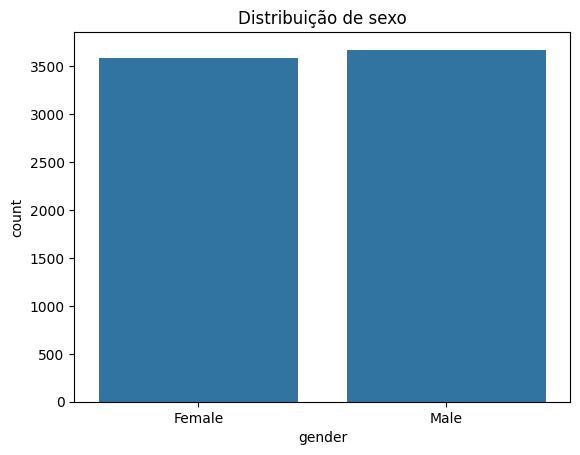

In [48]:
# Visualizar a distribuição de generos
sns.countplot(data=df, x=df_normalizado_customers['gender'])
plt.title('Distribuição de sexo')
plt.show()

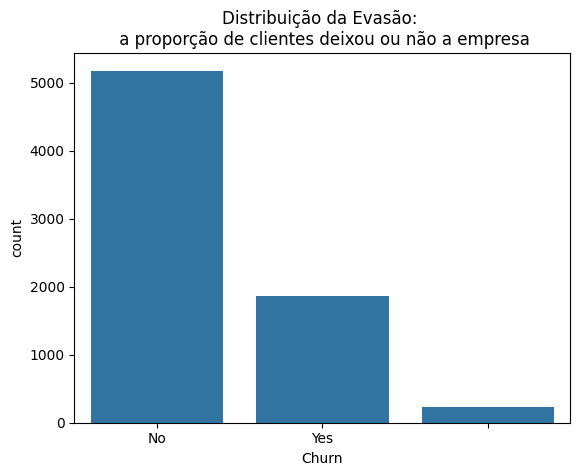

In [49]:
# Visualizar a distribuição da variável alvo (Churn)
sns.countplot(data=df, x='Churn')
plt.title('Distribuição da Evasão: \n a proporção de clientes deixou ou não a empresa')
plt.show()

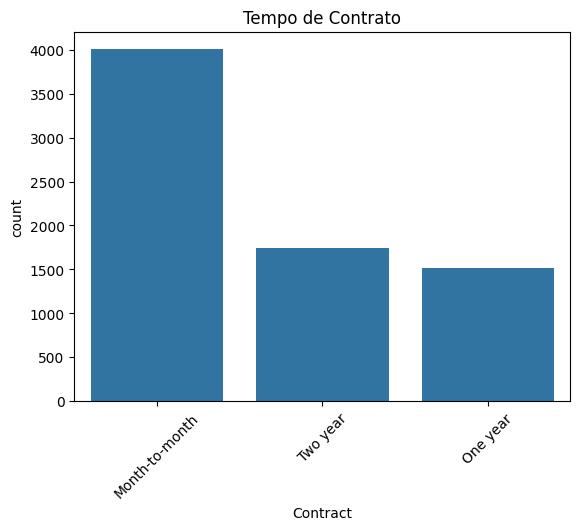

In [50]:
# Distribuição de contratos
sns.countplot(data=df_normalizado_accounts, x='Contract', order=df_normalizado_accounts['Contract'].value_counts().index)
plt.title('Tempo de Contrato')
plt.xticks(rotation=45)
plt.show()

In [76]:
# Calcular a taxa de evasão por tipo de contrato
churn_by_contract = df.groupby(df_normalizado_accounts['Contract'])['Churn'].value_counts().unstack().fillna(0)
churn_by_contract['Churn Rate (%)'] = churn_by_contract['Yes'] / (churn_by_contract['Yes'] + churn_by_contract['No']) * 100

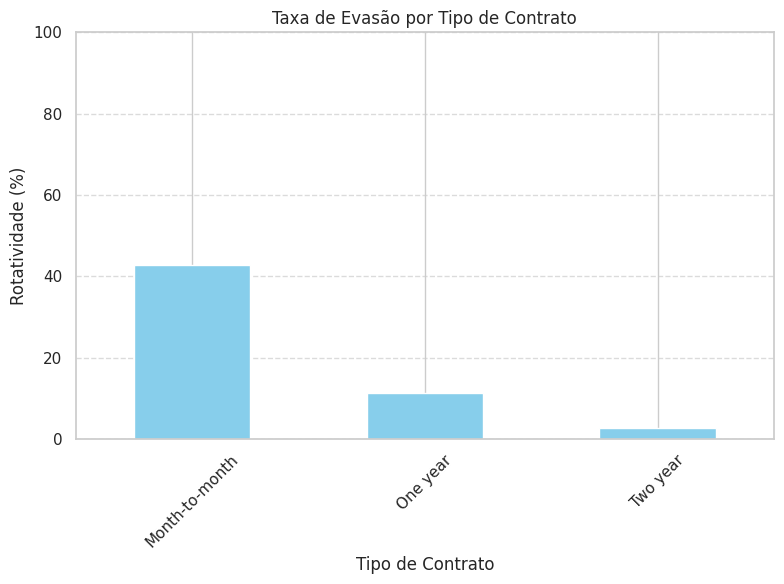

In [74]:
# Plotar o gráfico
plt.figure(figsize=(8,6))
churn_by_contract['Churn Rate (%)'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Taxa de Evasão por Tipo de Contrato')
plt.ylabel('Rotatividade (%)')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [77]:
# Calcular a taxa de evasão por tipo de seerviço
churn_by_internet = df.groupby(df_normalizado_internet['InternetService'])['Churn'].value_counts().unstack().fillna(0)
churn_by_internet['Churn Rate (%)'] = churn_by_internet['Yes'] / (churn_by_internet['Yes'] + churn_by_internet['No']) * 100

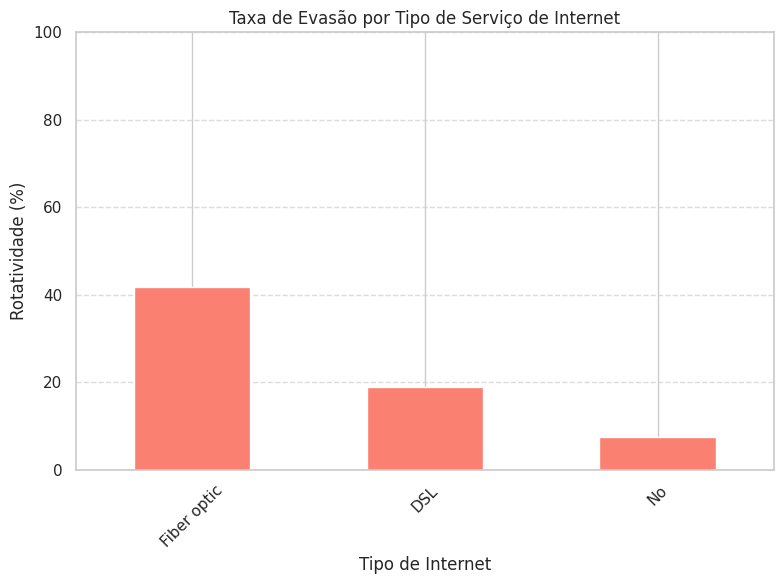

In [80]:
# Plotar o gráfico
plt.figure(figsize=(8,6))
churn_by_internet['Churn Rate (%)'].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Taxa de Evasão por Tipo de Serviço de Internet')
plt.ylabel('Rotatividade (%)')
plt.xlabel('Tipo de Internet')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [82]:
# Calcular a taxa de evasão por Faixa de senioridade (Idoso ou não Idoso)
churn_by_senior = df.groupby(df_normalizado_customers['SeniorCitizen'])['Churn'].value_counts().unstack().fillna(0)
churn_by_senior['Churn Rate (%)'] = churn_by_senior['Yes'] / (churn_by_senior['Yes'] + churn_by_senior['No']) * 100

In [84]:
# Ajustar rótulo para melhor visualização
labels = {0: 'Não Idoso', 1: 'Idoso'}
churn_by_senior.index = churn_by_senior.index.map(labels)

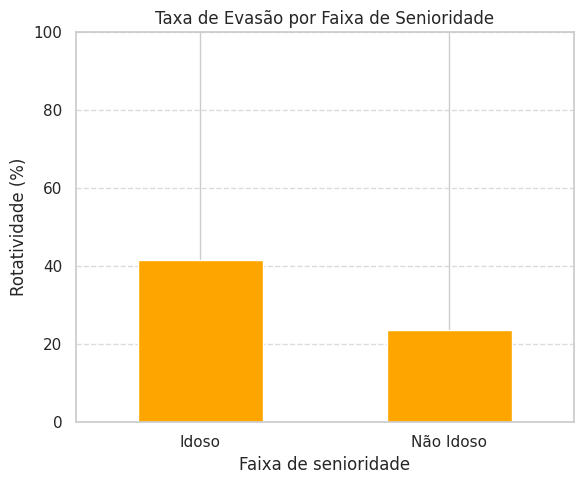

In [86]:
# Plotar o gráfico
plt.figure(figsize=(6,5))
churn_by_senior['Churn Rate (%)'].sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Taxa de Evasão por Faixa de Senioridade')
plt.ylabel('Rotatividade (%)')
plt.xlabel('Faixa de senioridade')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

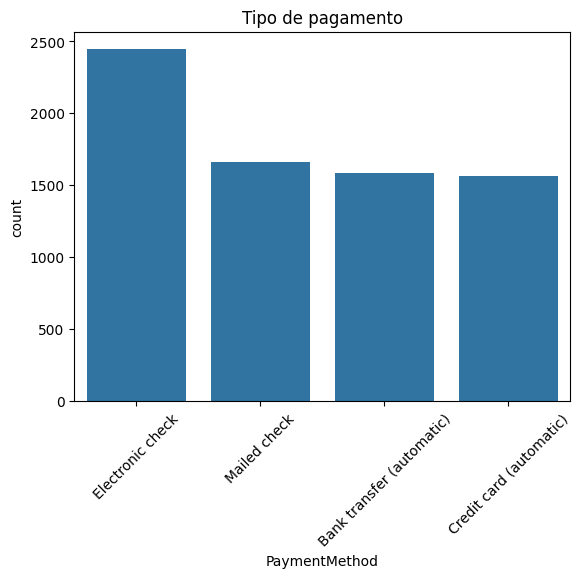

In [51]:
# Forma de pagamento
sns.countplot(data=df_normalizado_accounts, x='PaymentMethod', order=df_normalizado_accounts['PaymentMethod'].value_counts().index)
plt.title('Tipo de pagamento')
plt.xticks(rotation=45)
plt.show()

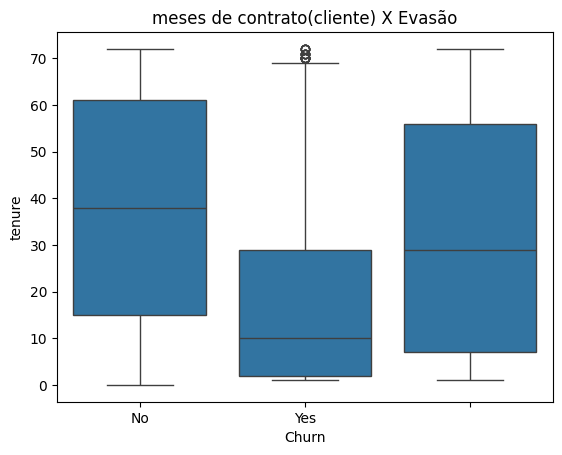

In [52]:
# Boxplot de tenure vs Charges.Total
sns.boxplot(data=df, x='Churn', y=df_normalizado_customers['tenure'])
plt.title('meses de contrato(cliente) X Evasão')
plt.ylabel('tenure')
plt.xlabel('Churn')
plt.show()

In [90]:
# Criar bins de tenure
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df['tenure_group'] = pd.cut(df_normalizado_customers['tenure'], bins=bins, labels=labels, right=True)

In [91]:
# Calcular taxa de churn por grupo de tenure
churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts().unstack().fillna(0)
churn_by_tenure['Churn Rate (%)'] = churn_by_tenure['Yes'] / (churn_by_tenure['Yes'] + churn_by_tenure['No']) * 100

/tmp/ipython-input-91-3897491064.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts().unstack().fillna(0)


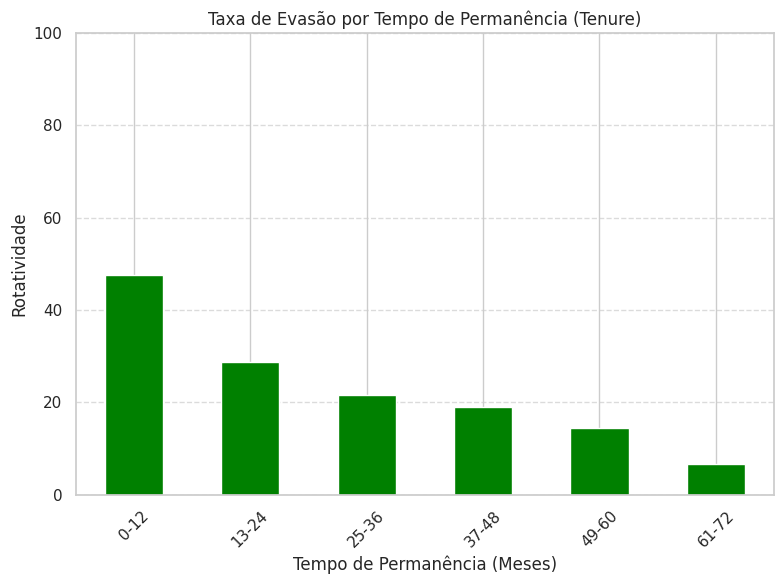

In [92]:
# Plotar o gráfico
plt.figure(figsize=(8,6))
churn_by_tenure['Churn Rate (%)'].plot(kind='bar', color='green')
plt.title('Taxa de Evasão por Tempo de Permanência (Tenure)')
plt.ylabel('Rotatividade')
plt.xlabel('Tempo de Permanência (Meses)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

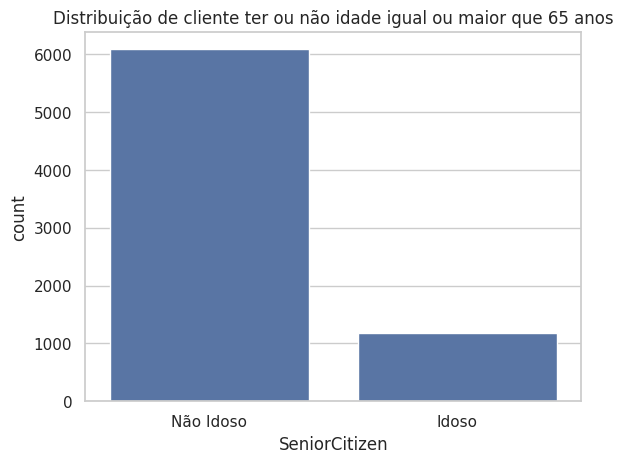

In [89]:
# Distribuição de SeniorCitizen
sns.countplot(data=df, x=df_normalizado_customers['SeniorCitizen'])
plt.title('Distribuição de cliente ter ou não idade igual ou maior que 65 anos')
plt.xticks([0,1], ['Não Idoso', 'Idoso'])
plt.show()

/tmp/ipython-input-54-1605219275.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=df_normalizado_accounts['Charges.Total'], palette='pastel')


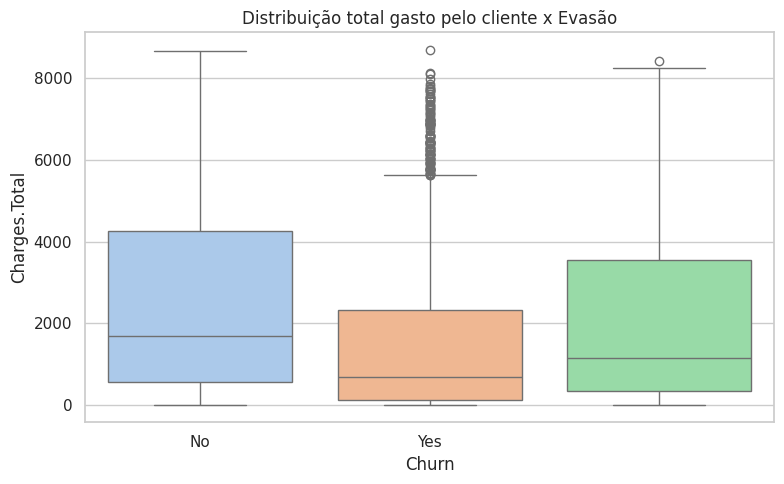

In [54]:
# Gerar o boxplot para Charges.Total por Churn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y=df_normalizado_accounts['Charges.Total'], palette='pastel')
plt.title('Distribuição total gasto pelo cliente x Evasão')
plt.ylabel('Charges.Total')
plt.xlabel('Churn')
plt.tight_layout()
plt.show()

In [94]:
# Calcular a correlação
correlation = df_normalizado_customers['tenure'].corr(df_normalizado_accounts['Charges.Total'])
print(f"Correlação entre Tempo de permancencia(meses) e Total gasto: {correlation:.2f}")

Correlação entre Tempo de permancencia(meses) e Total gasto: 0.83


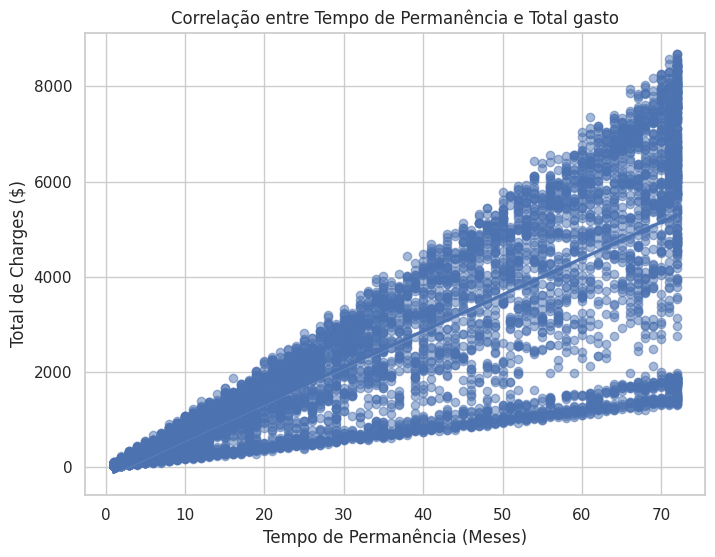

In [95]:
# Plotar o gráfico de dispersão com linha de tendência
plt.figure(figsize=(8,6))
sns.regplot(x=df_normalizado_customers['tenure'], y=df_normalizado_accounts['Charges.Total'], data=df, scatter_kws={'alpha':0.5})
plt.title('Correlação entre Tempo de Permanência e Total gasto')
plt.xlabel('Tempo de Permanência (Meses)')
plt.ylabel('Total de Charges ($)')
plt.grid(True)
plt.show()

# Relatorio final

## Introdução
O objetivo desta análise é compreender o fenômeno de evasão de clientes (Churn) na empresa de telecomunicações TelecomX. Churn representa a perda de clientes que cancelam seus serviços, o que impacta diretamente na receita e na sustentabilidade do negócio.

# Limpeza e Tratamento de Dados

## Importação de dados, normalização e tratamento de dados

Os dados foram fornecidos no arquivo TelecomX_Data.json, contendo informações detalhadas dos clientes como (a)Dados demográficos: gênero, idade. (b)Serviços contratados: internet. (c)Dados financeiros: tipo de contrato e pagamentos e (d)Status de Churn: se o cliente abandonou ou não o serviço. Além disso, como o JSON possuía estrutura aninhada, utilizamos o método pd.json_normalize() para transformar os dados em um formato tabular.

# Análise Exploratória de Dados

## Distribuição de Churn
Podemos obervar que a maior parte dos clientes não evadiu.

## Tipo de Internet
Clientes com internet Fiber Optic apresentam maior propensão ao churn.
Serviços DSL e ausência de internet estão associados a menor evasão.

## Perfil Demográfico - Idade
Clientes idosos (SeniorCitizen) têm taxas mais altas de churn.
Público idoso pode enfrentar dificuldades com o serviço.

## Tipo de Contrato
Clientes com contrato Month-to-Month têm a maior taxa de churn.
Contratos de longo prazo (One year e Two year) reduzem o risco de evasão.

## Correlação entre Variáveis Numéricas
Forte correlação entre o tempo de permanência (tenure) e o valor total pago (Charges.Total).
Baixa correlação entre valores mensais e churn.

# Conclusões e Insights
Contratos de longo prazo são um fator protetor contra churn.

Clientes Fiber Optic apresentam maior risco de evasão — possível insatisfação técnica ou de custo.

Clientes idosos e novos clientes são grupos vulneráveis ao churn.

Formas de pagamento automáticas (ex.: cartão de crédito) tendem a reter mais clientes em comparação com Electronic check.

## Recomendações

Com base na análise, as seguintes ações são recomendadas:

Fidelização e Contratos
Incentivar a renovação de contratos de longo prazo com promoções e bônus.

Suporte a Novos Clientes
Implementar programas de onboarding (acompanhamento nos primeiros 3 meses).

Monitorar os primeiros meses de relacionamento do cliente.

Segmento de Clientes Idosos
Desenvolver serviços de suporte simplificados e atendimento personalizado para idosos.

Clientes com Internet Fiber Optic
Pesquisar causas de insatisfação para este grupo.